In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("DS_DATA_SET/subset_subsfile.csv", low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308911 entries, 0 to 308910
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   source             308307 non-null  object
 1   service            308911 non-null  object
 2   adnet              147468 non-null  object
 3   browser            100126 non-null  object
 4   handset            97173 non-null   object
 5   pixel              89023 non-null   object
 6   publisher          110947 non-null  object
 7   trxid              120148 non-null  object
 8   profile_status     281514 non-null  object
 9   freemium_end_date  200000 non-null  object
 10  unsubs_from        63458 non-null   object
 11  unsubs_date        104285 non-null  object
 12  subs_date          308911 non-null  object
 13  renewal_date       308911 non-null  object
 14  revenue            308911 non-null  object
 15  id                 308911 non-null  int64 
 16  country            3

In [4]:
df['revenue'].value_counts()

revenue
0         224141
6           6188
10000       4173
4000        3971
5000        3922
           ...  
41400          1
53100          1
41700          1
33600          1
251000         1
Name: count, Length: 512, dtype: int64

In [5]:
missing_values=df['publisher'].isnull().mean()*100
print(f"missing values: {missing_values:.2f}%")
non_missing_values=df['publisher'].notnull().mean()*100
print(f"non-missing values: {non_missing_values:.2f}%")

missing values: 64.08%
non-missing values: 35.92%


In [6]:
#mode imputation
mode_value=df['source'].mode()[0]
df['source'].fillna(mode_value, inplace=True)
mode_value

'sms'

In [7]:
df['source']=df['source'].str.lower()

In [8]:
df['source'].value_counts()

source
sms        180310
cp1         98125
wap         20293
web          5117
ussd         3267
mo_ussd      1018
lp3           500
portal        138
lp6            77
ussd_d         28
ussd_w         12
lp1             9
ivr             6
mo_sms          5
lp4             3
lp7             3
Name: count, dtype: int64

In [9]:
df['profile_status']=df['profile_status'].str.lower()

In [10]:
df['profile_status'].value_counts()

profile_status
active      276312
inactive      4265
unsub          937
Name: count, dtype: int64

In [11]:
mode_value=df['profile_status'].mode()[0]
df['profile_status'].fillna(mode_value, inplace=True)

In [12]:
df['profile_status'].value_counts()

profile_status
active      303709
inactive      4265
unsub          937
Name: count, dtype: int64

In [13]:
df['source'].value_counts()

source
sms        180310
cp1         98125
wap         20293
web          5117
ussd         3267
mo_ussd      1018
lp3           500
portal        138
lp6            77
ussd_d         28
ussd_w         12
lp1             9
ivr             6
mo_sms          5
lp4             3
lp7             3
Name: count, dtype: int64

In [14]:
df['operator']=df['operator'].str.lower()

In [15]:
df['operator'].value_counts()

operator
ais                   200000
tplus                  41072
ltc                    32985
omantel                21676
etl                     7457
sen-orange-mtarget      5721
Name: count, dtype: int64

In [16]:
#service and source columns segementation
df['service_price'] = df['service_price'].apply(lambda x: 0 if isinstance(x, str) and ('-' in x or ':' in x) else float(x))

In [17]:
df['revenue'].value_counts()

revenue
0         224141
6           6188
10000       4173
4000        3971
5000        3922
           ...  
41400          1
53100          1
41700          1
33600          1
251000         1
Name: count, Length: 512, dtype: int64

In [18]:
df['service_price'].nunique()

6

In [19]:
cross_tab = pd.crosstab(df['revenue'], df['service_price'])
cross_tab

service_price,0.0,6.0,150.0,300.0,2000.0,10000.0
revenue,,,,,,
0,16254,191132,4565,11658,125,407
00:00:00,0,0,181,0,0,0
1000,2330,0,0,0,7,0
10000,3340,0,0,0,32,801
100000,28,0,0,0,0,0
...,...,...,...,...,...,...
96000,33,0,0,0,0,0
97000,26,0,0,0,0,0
98000,19,0,0,0,0,0


In [20]:
df['service'].value_counts()

service
gemezz       79489
459505104    45242
459509902    42101
459505106    36931
459505105    30001
459509903    24162
goaly        21676
459509901    21563
slypee        7457
halogame       274
Halogame        15
Name: count, dtype: int64

In [21]:
#country, operator and status segementations 
df['geo_op_status'] = df['country'] + '-' + df['operator'] + '-' + df['profile_status']

In [22]:
df['geo_op_status'].unique()

array(['TH-ais-active', 'TH-ais-unsub', 'SN-sen-orange-mtarget-active',
       'LA-etl-inactive', 'LA-tplus-active', 'LA-etl-active',
       'LA-ltc-active', 'LA-tplus-inactive', 'LA-ltc-inactive',
       'OM-omantel-active'], dtype=object)

In [23]:
df['service_source_sgmnt'] = df['source'].astype(str) + '-' + df['service'].astype(str)

In [24]:
df['service_source_sgmnt'].unique()

array(['sms-459505104', 'ivr-459505106', 'wap-459505105', 'sms-459505106',
       'sms-459509902', 'sms-459509903', 'sms-459509901', 'wap-459509902',
       'sms-459505105', 'wap-459505104', 'wap-459509903', 'wap-459505106',
       'ivr-459505105', 'ivr-459509902', 'ivr-459509901', 'wap-459509901',
       'web-gemezz', 'sms-gemezz', 'ussd-slypee', 'cp1-gemezz',
       'cp1-slypee', 'lp3-slypee', 'lp4-slypee', 'lp1-slypee',
       'sms-slypee', 'mo_ussd-gemezz', 'portal-gemezz', 'lp6-gemezz',
       'mo_sms-gemezz', 'mo_ussd-halogame', 'mo_ussd-Halogame',
       'portal-halogame', 'lp7-gemezz', 'ussd_w-halogame',
       'ussd_d-halogame', 'cp1-goaly'], dtype=object)

In [25]:
cross_tab = pd.crosstab(df['service_source_sgmnt'], df['geo_op_status'])
cross_tab

geo_op_status,LA-etl-active,LA-etl-inactive,LA-ltc-active,LA-ltc-inactive,LA-tplus-active,LA-tplus-inactive,OM-omantel-active,SN-sen-orange-mtarget-active,TH-ais-active,TH-ais-unsub
service_source_sgmnt,,,,,,,,,,
cp1-gemezz,0,0,31843,234,40205,494,0,0,0,0
cp1-goaly,0,0,0,0,0,0,21676,0,0,0
cp1-slypee,1947,1726,0,0,0,0,0,0,0,0
ivr-459505105,0,0,0,0,0,0,0,0,2,0
ivr-459505106,0,0,0,0,0,0,0,0,1,0
ivr-459509901,0,0,0,0,0,0,0,0,2,0
ivr-459509902,0,0,0,0,0,0,0,0,1,0
lp1-slypee,3,6,0,0,0,0,0,0,0,0
lp3-slypee,269,231,0,0,0,0,0,0,0,0


/home/abbas/DATA_SCIENCE_PROJECT/Preprocessing_Subs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/abbas/DATA_SCIENCE_PROJECT/Preprocessing_Subs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/abbas/DATA_SCIENCE_PROJECT/Preprocessing_Subs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/abbas/DATA_SCIENCE_PROJECT/Preprocessing_Subs/myenv/lib/python3.11/site-packages/seaborn/_oldc

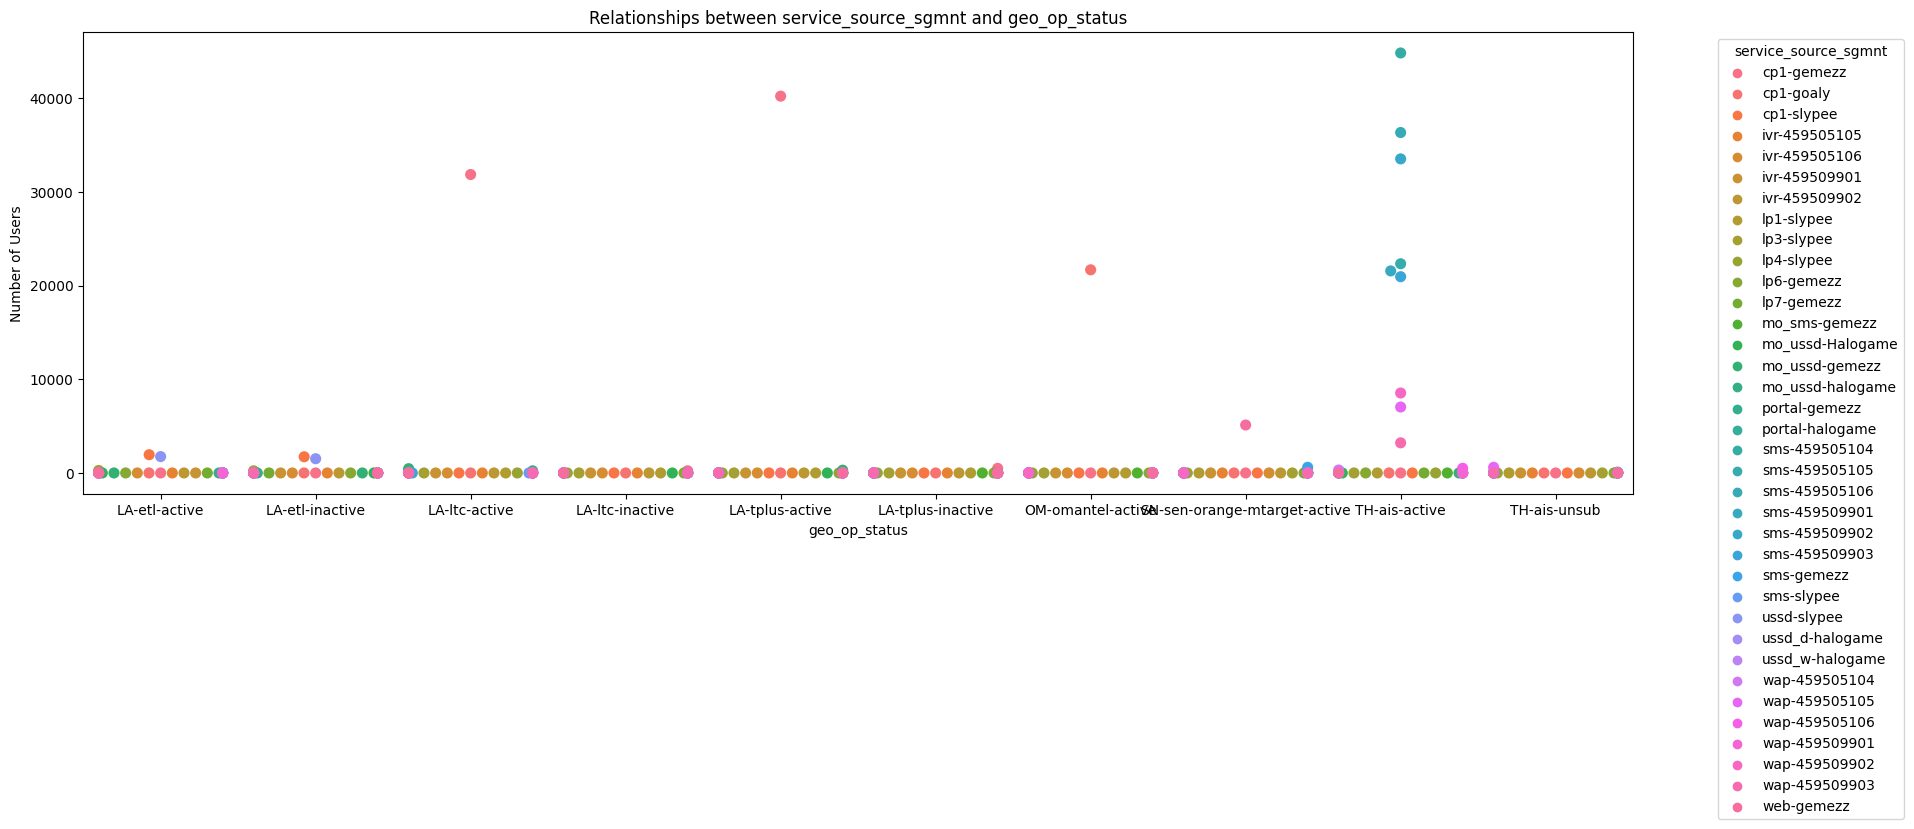

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

service_geo_cross_site = pd.crosstab(df['geo_op_status'], df['service_source_sgmnt'])

# Reshape the data for seaborn
df_melted = service_geo_cross_site.reset_index().melt(id_vars='geo_op_status', var_name='service_source_sgmnt')

# Use seaborn swarm plot
plt.figure(figsize=(20, 6))
sns.swarmplot(x='geo_op_status', y='value', hue='service_source_sgmnt', data=df_melted, size=8)
plt.title("Relationships between service_source_sgmnt and geo_op_status")
plt.xlabel("geo_op_status")
plt.ylabel("Number of Users")
plt.legend(title="service_source_sgmnt", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


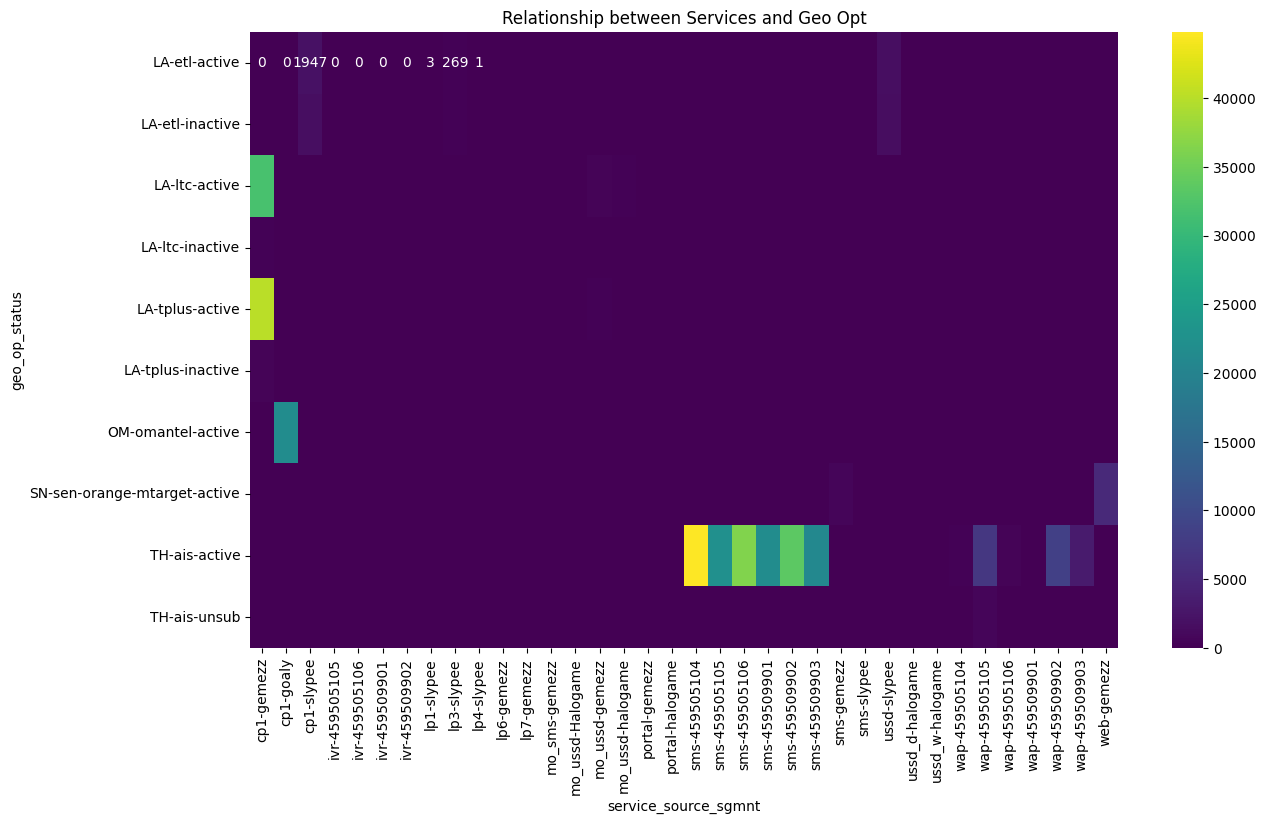

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
cross_tab = pd.crosstab(df['geo_op_status'], df['service_source_sgmnt'])

plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d', cbar=True)
plt.title('Relationship between Services and Geo Opt')
plt.xlabel('service_source_sgmnt')
plt.ylabel('geo_op_status')
plt.show()


In [57]:
#analysing the result of the graph
filtered_df = df[df['service_source_sgmnt'] == 'cp1-gemezz']

total_cp1_gemezz_users = len(filtered_df)

count_la_tplus_active = len(filtered_df[filtered_df['geo_op_status'] == 'LA-ltc-active'])

percentage_la_tplus_active = (count_la_tplus_active / total_cp1_gemezz_users) * 100
percentage_la_tplus_active

43.754809277783885

In [58]:
df['service'].value_counts()

service
gemezz       79489
459505104    45242
459509902    42101
459505106    36931
459505105    30001
459509903    24162
goaly        21676
459509901    21563
slypee        7457
halogame       274
Halogame        15
Name: count, dtype: int64

In [59]:
df.isnull().sum()

source                        0
service                       0
adnet                    161443
browser                  208785
handset                  211738
pixel                    219888
publisher                197964
trxid                    188763
profile_status                0
freemium_end_date        108911
unsubs_from              245453
unsubs_date              204626
subs_date                     0
renewal_date                  0
revenue                       0
id                            0
country                       0
operator                      0
cycle                         0
service_price                 0
revenue_segment               0
service_price_segment         0
combined_segment              0
geo_op_status                 0
service_source_sgmnt          0
dtype: int64

In [60]:
df['source'].value_counts()

source
sms        180310
cp1         98125
wap         20293
web          5117
ussd         3267
mo_ussd      1018
lp3           500
portal        138
lp6            77
ussd_d         28
ussd_w         12
lp1             9
ivr             6
mo_sms          5
lp4             3
lp7             3
Name: count, dtype: int64

In [61]:
df['service'].value_counts()

service
gemezz       79489
459505104    45242
459509902    42101
459505106    36931
459505105    30001
459509903    24162
goaly        21676
459509901    21563
slypee        7457
halogame       274
Halogame        15
Name: count, dtype: int64

In [62]:
df.isnull().sum()

source                        0
service                       0
adnet                    161443
browser                  208785
handset                  211738
pixel                    219888
publisher                197964
trxid                    188763
profile_status                0
freemium_end_date        108911
unsubs_from              245453
unsubs_date              204626
subs_date                     0
renewal_date                  0
revenue                       0
id                            0
country                       0
operator                      0
cycle                         0
service_price                 0
revenue_segment               0
service_price_segment         0
combined_segment              0
geo_op_status                 0
service_source_sgmnt          0
dtype: int64

In [64]:
df['adnet'].value_counts()

adnet
marvel                          73206
star                            16780
lig                             11844
fmd                              9418
kee                              8567
                                ...  
lig-64f124ab6b6b27000120896f        1
star-APP1693359063987480            1
star-APP1693447587507977            1
star-APP1693617008184611            1
lig-64f2196b8d82260001549468        1
Name: count, Length: 1264, dtype: int64

In [65]:
df['adnet']=df['adnet'].fillna('missing')

In [66]:
df['browser']=df['browser'].fillna('missing')

In [67]:
df['browser'].unique()

array(['missing', 'okhttp', 'Go-http-client', 'Chrome', 'No Detected',
       'Facebook App', 'Huawei Browser', 'Safari', 'go-resty',
       'Samsung Browser', 'Instagram App', 'not found', 'Firefox',
       'RestSharp', 'Opera 8.01', 'Internet Explorer', 'Ubuntu',
       'GuzzleHttp', 'WhatsApp', 'Edge', 'Mobile DuckDuckGo',
       'Apache-HttpClient', 'iPhone', 'PostmanRuntime'], dtype=object)

In [68]:
#cross tabulations and anlysis
crostab=pd.crosstab(df['service_source_sgmnt'], df['browser'])
display(crostab.iloc[:, 0:12]) 


browser,Apache-HttpClient,Chrome,Edge,Facebook App,Firefox,Go-http-client,GuzzleHttp,Huawei Browser,Instagram App,Internet Explorer,Mobile DuckDuckGo,No Detected
service_source_sgmnt,,,,,,,,,,,,
cp1-gemezz,0,55,1,15,0,72607,0,1,0,0,0,0
cp1-goaly,17287,661,0,0,0,0,660,0,0,0,0,0
cp1-slypee,0,0,0,0,0,0,0,0,0,0,0,3673
ivr-459505105,0,0,0,0,0,0,0,0,0,0,0,0
ivr-459505106,0,0,0,0,0,0,0,0,0,0,0,0
ivr-459509901,0,0,0,0,0,0,0,0,0,0,0,0
ivr-459509902,0,0,0,0,0,0,0,0,0,0,0,0
lp1-slypee,0,8,0,1,0,0,0,0,0,0,0,0
lp3-slypee,0,457,1,30,1,0,0,1,1,0,0,0


In [69]:
df['pixel'].isnull().mean()*100

71.18166721159169

In [70]:
df['pixel'].nunique()

77375

In [71]:
df['browser'].value_counts()

browser
missing              208785
Go-http-client        72850
Apache-HttpClient     17287
No Detected            3673
okhttp                 2446
Chrome                 2155
GuzzleHttp              663
not found               481
go-resty                233
RestSharp               153
Facebook App             67
Firefox                  32
Safari                   27
Internet Explorer        20
Samsung Browser          15
Huawei Browser            6
Ubuntu                    6
Opera 8.01                4
PostmanRuntime            2
Edge                      2
Instagram App             1
WhatsApp                  1
Mobile DuckDuckGo         1
iPhone                    1
Name: count, dtype: int64

In [79]:
import numpy as np

#segmentation criteris
def browser_segmentation(browser):
    if "app" in browser.lower():
        return "mobileapps"
    elif "desktop" in browser.lower():
        return "desktop"
    elif browser.lower() in ["missing", "not detected", "no detected"]:
        return "missing/undetected"
    else:
        return browser

# applying the browser_segmentation to create a new column
df['browser_segment'] = df['browser'].apply(browser_segmentation)







In [81]:
cross_tab = pd.crosstab(df['browser_segment'], df['service_source_sgmnt'])
cross_tab

service_source_sgmnt,cp1-gemezz,cp1-goaly,cp1-slypee,ivr-459505105,ivr-459505106,ivr-459509901,ivr-459509902,lp1-slypee,lp3-slypee,lp4-slypee,...,ussd-slypee,ussd_d-halogame,ussd_w-halogame,wap-459505104,wap-459505105,wap-459505106,wap-459509901,wap-459509902,wap-459509903,web-gemezz
browser_segment,,,,,,,,,,,,,,,,,,,,,
Apache-HttpClient,0,17287,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chrome,55,661,0,0,0,0,0,8,457,2,...,822,1,0,0,0,0,0,0,0,0
Edge,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Firefox,0,0,0,0,0,0,0,0,1,0,...,0,3,0,0,0,0,0,0,0,0
Go-http-client,72607,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GuzzleHttp,0,660,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Huawei Browser,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Internet Explorer,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
Mobile DuckDuckGo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df['browser_segment'].unique()

array(['missing/undetected', 'okhttp', 'Go-http-client', 'Chrome',
       'mobileapps', 'Huawei Browser', 'Safari', 'go-resty',
       'Samsung Browser', 'not found', 'Firefox', 'RestSharp',
       'Opera 8.01', 'Internet Explorer', 'Ubuntu', 'GuzzleHttp', 'Edge',
       'Mobile DuckDuckGo', 'Apache-HttpClient', 'iPhone',
       'PostmanRuntime'], dtype=object)

In [74]:
df['pixel']=df['pixel'].fillna('missing ads')

In [75]:
df['publisher'].isnull().mean()*100

64.08447740611373

In [76]:
df['publisher']=df['publisher'].fillna("unknown")

In [77]:
df['publisher'].nunique()

1207

In [82]:
df['publisher']=df['publisher'].str.lower()

In [83]:
#publisher_segmentation
df['publisher_segment'] = df['publisher'].apply(lambda x: 'lumos' if x == 'lumos' else ('unknown' if x == 'unknown' else 'star' if x=='star' else 'lig' if x=='lig' else 'others'))
df['publisher_segment'].unique()

array(['unknown', 'star', 'lig', 'others', 'lumos'], dtype=object)

In [84]:
cross_tab = pd.crosstab(df['service_source_sgmnt'], df['publisher_segment'], margins=True, margins_name="Total")
cross_tab

publisher_segment,lig,lumos,others,star,unknown,Total
service_source_sgmnt,,,,,,
cp1-gemezz,0,72776,0,0,0,72776
cp1-goaly,0,21676,0,0,0,21676
cp1-slypee,0,3673,0,0,0,3673
ivr-459505105,0,0,0,1,1,2
ivr-459505106,0,0,0,0,1,1
ivr-459509901,0,0,0,0,2,2
ivr-459509902,0,0,0,0,1,1
lp1-slypee,0,9,0,0,0,9
lp3-slypee,0,500,0,0,0,500


In [85]:
cross_tab = pd.crosstab(df['service_source_sgmnt'], df['publisher_segment'])
cross_tab

publisher_segment,lig,lumos,others,star,unknown
service_source_sgmnt,,,,,
cp1-gemezz,0,72776,0,0,0
cp1-goaly,0,21676,0,0,0
cp1-slypee,0,3673,0,0,0
ivr-459505105,0,0,0,1,1
ivr-459505106,0,0,0,0,1
ivr-459509901,0,0,0,0,2
ivr-459509902,0,0,0,0,1
lp1-slypee,0,9,0,0,0
lp3-slypee,0,500,0,0,0


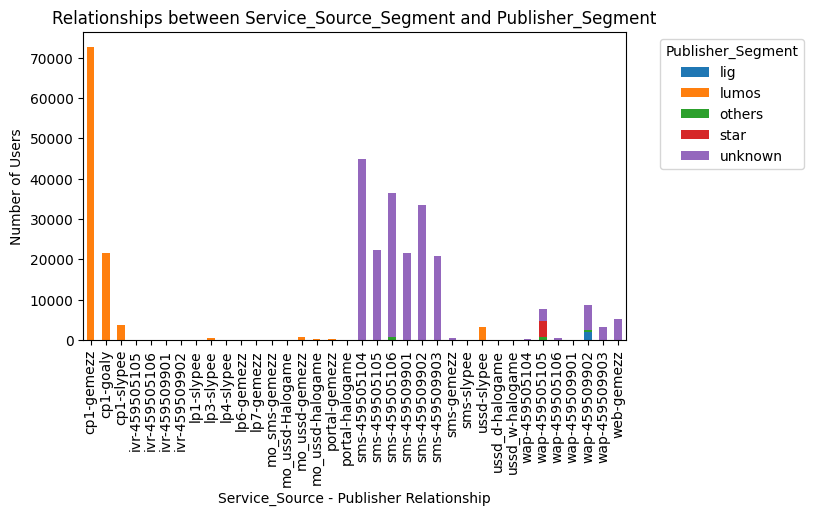

In [86]:
# Plot the cross-tabulation as a stacked bar plot
cross_tab.plot(kind='bar', stacked=True, figsize=(7, 4))
plt.title("Relationships between Service_Source_Segment and Publisher_Segment")
plt.xlabel("Service_Source - Publisher Relationship")
plt.ylabel("Number of Users")
plt.legend(title="Publisher_Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

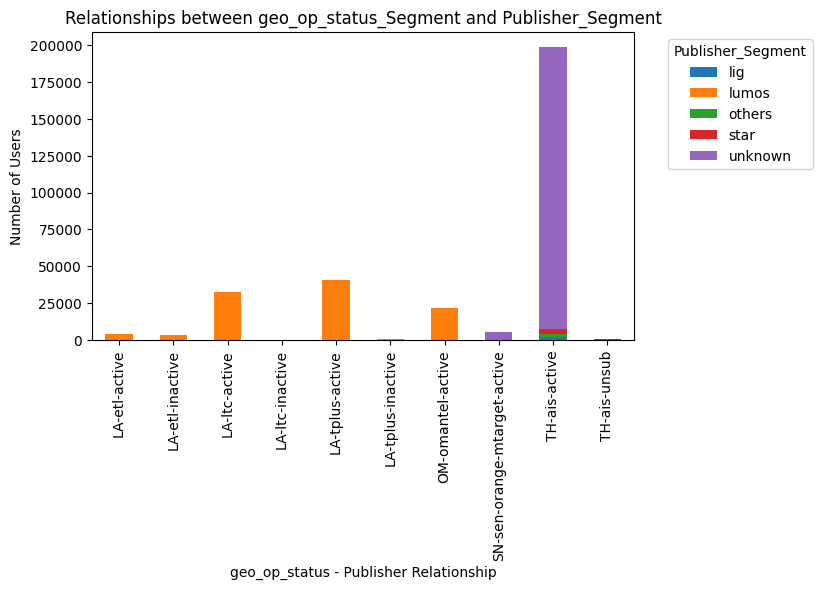

In [87]:
cross_geo = pd.crosstab(df['geo_op_status'], df['publisher_segment'])
cross_geo.plot(kind='bar', stacked=True, figsize=(7, 4))
plt.title("Relationships between geo_op_status_Segment and Publisher_Segment")
plt.xlabel("geo_op_status - Publisher Relationship")
plt.ylabel("Number of Users")
plt.legend(title="Publisher_Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308911 entries, 0 to 308910
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   source             308307 non-null  object
 1   service            308911 non-null  object
 2   adnet              147468 non-null  object
 3   browser            100126 non-null  object
 4   handset            97173 non-null   object
 5   pixel              89023 non-null   object
 6   publisher          308911 non-null  object
 7   trxid              120148 non-null  object
 8   profile_status     281514 non-null  object
 9   freemium_end_date  200000 non-null  object
 10  unsubs_from        63458 non-null   object
 11  unsubs_date        104285 non-null  object
 12  subs_date          308911 non-null  object
 13  renewal_date       308911 non-null  object
 14  revenue            308911 non-null  object
 15  id                 308911 non-null  int64 
 16  country            3

In [ ]:
df['browser'].unique()

In [88]:
cross_site= pd.crosstab(df['browser_segment'], df['publisher_segment'])
cross_site

publisher_segment,lig,lumos,others,star,unknown
browser_segment,,,,,
Apache-HttpClient,0,17287,0,0,0
Chrome,0,2155,0,0,0
Edge,0,2,0,0,0
Firefox,0,32,0,0,0
Go-http-client,0,72850,0,0,0
GuzzleHttp,0,663,0,0,0
Huawei Browser,0,6,0,0,0
Internet Explorer,0,20,0,0,0
Mobile DuckDuckGo,0,1,0,0,0


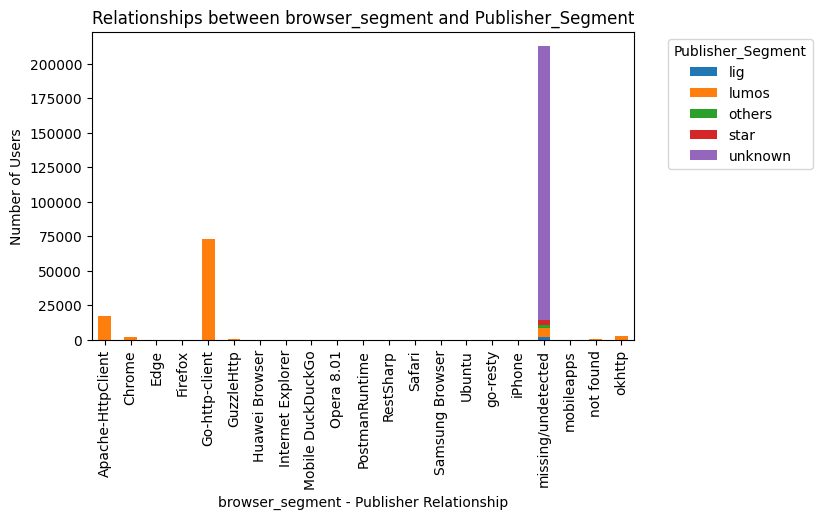

In [89]:
cross_site = pd.crosstab(df['browser_segment'], df['publisher_segment'])
cross_site.plot(kind='bar', stacked=True, figsize=(7, 4))
plt.title("Relationships between browser_segment and Publisher_Segment")
plt.xlabel("browser_segment - Publisher Relationship")
plt.ylabel("Number of Users")
plt.legend(title="Publisher_Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [14]:
df.isnull().sum()

source                  604
service                   0
adnet                161443
browser              208785
handset              211738
pixel                219888
publisher                 0
trxid                188763
profile_status        27397
freemium_end_date    108911
unsubs_from          245453
unsubs_date          204626
subs_date                 0
renewal_date              0
revenue                   0
id                        0
country                   0
operator                  0
cycle                     0
service_price             0
dtype: int64

In [15]:
df['trxid'].nunique()

19577

In [16]:
len(df['id'])

308911

In [17]:
df['trxid'].head()

0    20230913070749401088
1    20230913070724300800
2    20230825140205699072
3    20230913071052099584
4    20230913070115598336
Name: trxid, dtype: object

In [18]:
df.isnull().sum()


source                  604
service                   0
adnet                161443
browser              208785
handset              211738
pixel                219888
publisher                 0
trxid                188763
profile_status        27397
freemium_end_date    108911
unsubs_from          245453
unsubs_date          204626
subs_date                 0
renewal_date              0
revenue                   0
id                        0
country                   0
operator                  0
cycle                     0
service_price             0
dtype: int64

In [19]:
df['trxid']=df['trxid'].fillna('not_found')

In [20]:
df['trxid'].nunique()

19578

In [21]:
#adnet segmentation
df['adnet_segment'] = df['adnet'].apply(lambda x: 'marvel' if x == 'marvel' else ('star' if x == 'star' else 'lig' if x=='lig' else 'lig' if x=='lig' else 'fmd' if x=='fmd' else 'kee' if x=='kee' else 'default' if x=='default' else 'mbp' if x=='mbp' else 'outrix' if x=='outrix' else 'mpl' if x=='mpl' else 'ven' if x=='ven' else 'mbv' if x=='mbv' else 'ozo' if x=='ozo' else 'movi' if x=='movi' else 'missing' if x=='missing' else 'below_1000'))
df['adnet_segment'].value_counts()

adnet_segment
below_1000    174792
marvel         73206
star           16780
lig            11844
fmd             9418
kee             8567
default         4470
outrix          2739
mpl             1836
ven             1416
mbv             1351
ozo             1288
movi            1204
Name: count, dtype: int64

In [22]:
df['adnet']=df['adnet'].str.lower()

In [23]:
df['adnet'].value_counts().head(25)

adnet
marvel     73206
star       19448
lig        12053
fmd         9418
kee         8567
default     4470
mbp         3084
outrix      2739
mpl         1836
ven         1416
mbv         1351
ozo         1288
movi        1204
mov          859
sdt          724
ais          636
olimob       605
soy          605
bads         524
mvl          483
waki         456
svr          400
btm          216
mbvs         181
aiscm        150
Name: count, dtype: int64

In [ ]:
cross_marketing = pd.crosstab(df['adnet_segment'], df['publisher_segment'])
cross_marketing.plot(kind='bar', stacked=True, figsize=(7, 4))
plt.title("Relationships between adnet_segment and Publisher_Segment")
plt.xlabel("adnet_segment - Publisher Relationship")
plt.ylabel("Number of Users")
plt.legend(title="Publisher_Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
cross_marketing = pd.crosstab(df['adnet_segment'], df['publisher_segment'])
cross_marketing

In [77]:
df['publisher'].value_counts()

publisher
unknown                         197964
lumos                           103190
star                              3865
lig                               1957
mov                                734
                                 ...  
star-app1693359062546515             1
star-app1693530744094378             1
lig-64efcdc13981320001e1a88b         1
star-app1693531724764742             1
star-app1693360557821692             1
Name: count, Length: 1206, dtype: int64

In [78]:
df.isnull().sum()

source                        0
service                       0
adnet                         0
browser                       0
handset                  211738
pixel                         0
publisher                     0
trxid                         0
profile_status                0
freemium_end_date        108911
unsubs_from              245453
unsubs_date              204626
subs_date                     0
renewal_date                  0
revenue                       0
id                            0
country                       0
operator                      0
cycle                         0
service_price                 0
revenue_segment               0
service_price_segment         0
combined_segment              0
geo_op_status                 0
service_source_sgmnt          0
browser_segment               0
publisher_segment             0
adnet_segment                 0
dtype: int64

In [79]:
df['pixel'].value_counts()


pixel
missing ads                          219888
no                                     8689
xsp-23G20143025A035927033252GnEHJ      1236
zia-6498613b3346700001ca2398           1212
test121212                              297
                                      ...  
626347468                                 1
628355174                                 1
623898991                                 1
632383156                                 1
623555850                                 1
Name: count, Length: 77376, dtype: int64

In [80]:
df['subs_date'].unique()

array(['2022-10-20 19:28:02.000', '2020-08-23 16:11:02.000',
       '2023-08-25 14:02:05.000', ..., '2023-05-11 06:15:24.000',
       '2023-05-11 16:44:57.000', '2023-05-11 16:28:06.000'], dtype=object)

In [81]:

df['subs_date'] = pd.to_datetime(df['subs_date'])


In [82]:
df['subs_date'].unique()

<DatetimeArray>
['2022-10-20 19:28:02', '2020-08-23 16:11:02', '2023-08-25 14:02:05',
 '2023-09-09 13:03:24', '2022-09-26 19:36:03', '2021-08-06 16:27:07',
 '2023-01-01 03:02:04', '2023-06-23 23:26:04', '2021-07-23 16:40:11',
 '2022-06-16 09:51:02',
 ...
 '2023-05-10 08:24:55', '2023-05-10 11:32:37', '2023-05-10 19:39:30',
 '2023-05-10 03:06:44', '2023-05-11 06:22:24', '2023-05-11 09:50:11',
 '2023-05-11 09:49:50', '2023-05-11 06:15:24', '2023-05-11 16:44:57',
 '2023-05-11 16:28:06']
Length: 262952, dtype: datetime64[ns]

In [83]:
df['unsubs_date'].isnull().sum()


204626

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308911 entries, 0 to 308910
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   source                 308911 non-null  object        
 1   service                308911 non-null  object        
 2   adnet                  308911 non-null  object        
 3   browser                308911 non-null  object        
 4   handset                97173 non-null   object        
 5   pixel                  308911 non-null  object        
 6   publisher              308911 non-null  object        
 7   trxid                  308911 non-null  object        
 8   profile_status         308911 non-null  object        
 9   freemium_end_date      200000 non-null  object        
 10  unsubs_from            63458 non-null   object        
 11  unsubs_date            104285 non-null  object        
 12  subs_date              308911 non-null  date

In [86]:
df.isnull()

,source,service,adnet,browser,handset,pixel,publisher,trxid,profile_status,freemium_end_date,...,cycle,service_price,revenue_segment,service_price_segment,combined_segment,geo_op_status,service_source_sgmnt,browser_segment,publisher_segment,adnet_segment
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308906,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
308907,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
308908,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
308909,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308911 entries, 0 to 308910
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   source                 308911 non-null  object        
 1   service                308911 non-null  object        
 2   adnet                  308911 non-null  object        
 3   browser                308911 non-null  object        
 4   handset                97173 non-null   object        
 5   pixel                  308911 non-null  object        
 6   publisher              308911 non-null  object        
 7   trxid                  308911 non-null  object        
 8   profile_status         308911 non-null  object        
 9   freemium_end_date      200000 non-null  object        
 10  unsubs_from            63458 non-null   object        
 11  unsubs_date            104285 non-null  object        
 12  subs_date              308911 non-null  date

In [88]:
df.isnull().sum()

source                        0
service                       0
adnet                         0
browser                       0
handset                  211738
pixel                         0
publisher                     0
trxid                         0
profile_status                0
freemium_end_date        108911
unsubs_from              245453
unsubs_date              204626
subs_date                     0
renewal_date                  0
revenue                       0
id                            0
country                       0
operator                      0
cycle                         0
service_price                 0
revenue_segment               0
service_price_segment         0
combined_segment              0
geo_op_status                 0
service_source_sgmnt          0
browser_segment               0
publisher_segment             0
adnet_segment                 0
dtype: int64

In [89]:
df['revenue_segment'].unique()

array(['low-revenue', 'high-revenue', 'medium-revenue'], dtype=object)

In [90]:
#saving selected columns to a separte csv
selected_columns = ['source', 'service', 'adnet', 'browser', 'country', 'profile_status', 'publisher','cycle']
ready_data = df[selected_columns]
ready_data.to_csv("feature_data.csv", index=False)
